Figure S3B in Mahdavi et al. (2021) Environmental Pollution (in the Supplemental Information (SI))

This figure illustrates weekly data of trace metal concentration week-by-week in the studied home.

Plot type: Box plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

In [3]:
#### Data Preprocessing

elem_dict_label = {'V': 0,
                   'Sb': 1, 
                   'Sr': 2,  
                   'Ti': 3,  
                   'K': 4,  
                   'Fe': 5}

elem_label2 = dict((v, k) for k, v in elem_dict_label.items())

color_elem_code = {0: 'grey',
                   1: 'lightyellow',
                   2: 'darkgrey',
                   3: 'lightblue',
                   4: 'lightcoral', 
                   5: 'lightgreen'}

elem_list = stata_varlist_split('Pb As Cd Cu Zn Ni K Ti V Fe Sr Sb')
select_list = stata_varlist_split('K Ti V Fe Sr Sb')
df = pd.read_excel(backslash_correct(r'C:\PhD Research\Airborne\Processed\tm_concentration_master.xlsx'))

df_value = df[['visit'] + select_list].set_index('visit').unstack(level = 1)
df_error = df[['visit'] + [col + '_error' for col in select_list]].set_index('visit').unstack(level = 1)

a = df_value.reset_index().rename(columns = {'level_0':'Element', 
                                             0: 'Concentration'})

b = df_error.reset_index().rename(columns = {0: 'Error'})['Error']

df = pd.concat([a,b], axis = 1)
df.replace({'Element': elem_dict_label}, inplace = True)
df.sort_values(['Element', 'visit'], inplace = True)
df['counter'] = df['visit'] +  (df['Element']) * (6+1)

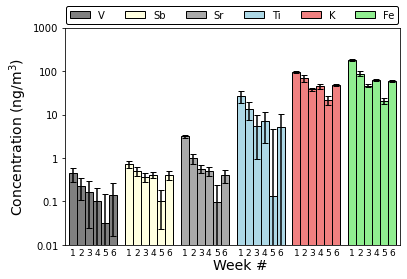

In [4]:
##################
### Figure S3B ###
##################

plt.figure()

plt.bar(df[df['Element'] == 0]['counter'],df[df['Element'] == 0]['Concentration'], 
        color = color_elem_code[0], width = 1, edgecolor = 'k', label = elem_label2[0],
        yerr = (df[df['Element'] == 0]['Error'], df[df['Element'] == 0]['Error']),
        ecolor = 'k', capsize = 3)

plt.bar(df[df['Element'] == 1]['counter'],df[df['Element'] == 1]['Concentration'], 
        color = color_elem_code[1], width = 1, edgecolor = 'k', label = elem_label2[1],
        yerr = (df[df['Element'] == 1]['Error'], df[df['Element'] == 1]['Error']),
        ecolor = 'k', capsize = 3)

x = df[df['Element'] == 2]['counter']
y = df[df['Element'] == 2]['Concentration']

plt.bar(x, y, 
        color = color_elem_code[2], width = 1, edgecolor = 'k', label = 'Sr',
        yerr = (df[df['Element'] == 2]['Error'], df[df['Element'] == 2]['Error']),
        ecolor = 'k', capsize = 3)

plt.bar(df[df['Element'] == 3]['counter'],df[df['Element'] == 3]['Concentration'], 
        color = color_elem_code[3], width = 1, edgecolor = 'k', label = elem_label2[3],
        yerr = (df[df['Element'] == 3]['Error'], df[df['Element'] == 3]['Error']),
        ecolor = 'k', capsize = 3)

plt.bar(df[df['Element'] == 4]['counter'],df[df['Element'] == 4]['Concentration'], 
        color = color_elem_code[4], width = 1, edgecolor = 'k', label = elem_label2[4],
        yerr = (df[df['Element'] == 4]['Error'], df[df['Element'] == 4]['Error']),
        ecolor = 'k', capsize = 3)

plt.bar(df[df['Element'] == 5]['counter'],df[df['Element'] == 5]['Concentration'], 
        color = color_elem_code[5], width = 1, edgecolor = 'k', label = elem_label2[5],
        yerr = (df[df['Element'] == 5]['Error'], df[df['Element'] == 5]['Error']),
        ecolor = 'k', capsize = 3)

plt.xticks([])
plt.xlim(0,42)

plt.yscale('log')
plt.ylim(0.01,1000)
a = [0.01, 0.1, 1, 10, 100, 1000]
plt.yticks(ticks = a, labels = a)
plt.ylabel('Concentration (ng/m$^{3}$)', size = 14)

plt.minorticks_off()

j = 0
for i in df['counter'].unique():
    plt.text(i, 0.0065, str(df.loc[j,'visit']), fontsize = 9, ha = 'center', va = 'center')
    j += 1
plt.text(22, 0.0035, 'Week #', fontsize = 14, ha = 'center', va = 'center')

plt.legend(bbox_to_anchor=(1.01, 1.12), ncol = 6, fontsize = 10, frameon = True, edgecolor = 'black', framealpha=1)
plt.savefig(r'C:/PhD Research/Airborne/Processed/plots/FigureS3B.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code